In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anthony_wrangle

In [2]:
train, validate, test = anthony_wrangle.wrangle_credit()

In [3]:
train.shape, validate.shape, test.shape

((26248, 49), (6563, 49), (3646, 49))

In [4]:
train.head()

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,...,occupation_type_managers,occupation_type_medicine_staff,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff,score
32073,5135805,0,1,0,90000.0,19482,2878,1,0,0,...,0,0,0,0,0,0,0,0,0,-40.0
31598,5132791,0,1,2,180000.0,13361,6586,1,1,0,...,0,0,0,0,0,0,0,0,0,14.0
24158,5096773,0,0,0,171000.0,21700,13879,1,0,0,...,0,0,1,0,0,0,0,0,0,74.0
34581,5146247,0,1,0,238500.0,23171,13879,1,0,0,...,0,0,1,0,0,0,0,0,0,93.0
16771,5067027,0,1,1,135000.0,13589,1649,1,0,0,...,0,0,0,0,0,0,0,0,1,38.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26248 entries, 32073 to 18632
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 26248 non-null  object 
 1   flag_own_car                                       26248 non-null  int64  
 2   flag_own_realty                                    26248 non-null  int64  
 3   cnt_children                                       26248 non-null  int64  
 4   amt_income_total                                   26248 non-null  float64
 5   days_birth                                         26248 non-null  int64  
 6   days_employed                                      26248 non-null  int64  
 7   flag_mobil                                         26248 non-null  int64  
 8   flag_work_phone                                    26248 non-null  int64  
 9   fl

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


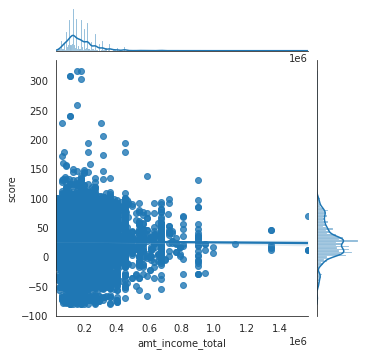

In [6]:
with sns.axes_style('white'):
    j = sns.jointplot("amt_income_total", "score", data=train, kind='reg', height=5);


In [7]:
train.amt_income_total.value_counts()

135000.0     3130
180000.0     2266
157500.0     2260
112500.0     2107
225000.0     2103
             ... 
160200.0        1
432000.0        1
1125000.0       1
177012.0        1
204750.0        1
Name: amt_income_total, Length: 253, dtype: int64

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


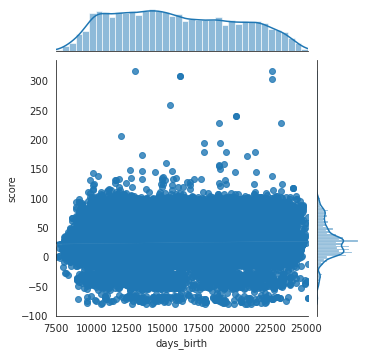

In [8]:
with sns.axes_style('white'):
    j = sns.jointplot("days_birth", "score", data=train, kind='reg', height=5);


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


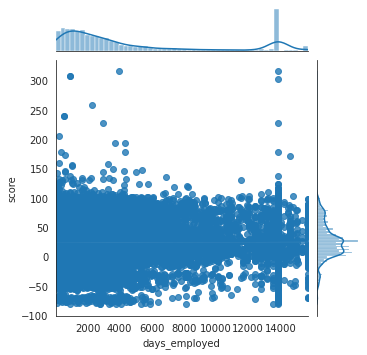

In [9]:
with sns.axes_style('white'):
    j = sns.jointplot("days_employed", "score", data=train, kind='reg', height=5);

In [10]:
train.score.value_counts()

26.0     714
32.0     611
34.0     610
28.0     588
30.0     588
        ... 
113.0      1
147.0      1
143.0      1
158.0      1
135.0      1
Name: score, Length: 234, dtype: int64

In [11]:
min(train.score)

-81.0

In [12]:
max(train.score)

316.0

<AxesSubplot:ylabel='Frequency'>

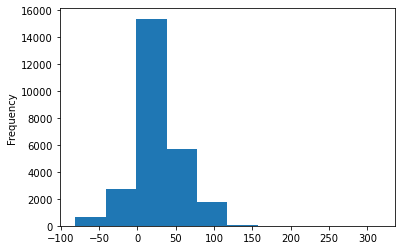

In [13]:
train['score'].plot(kind='hist')

In [14]:
train.score.describe()

count    26248.000000
mean        26.020954
std         31.704498
min        -81.000000
25%          7.000000
50%         24.000000
75%         44.000000
max        316.000000
Name: score, dtype: float64

In [15]:
#Negative score indicates a 'good' credit canditate. 
#It's a combination of making payments on time and length of credit history.

In [16]:
pd.qcut(train['score'], q=4)

32073    (-81.001, 7.0]
31598       (7.0, 24.0]
24158     (44.0, 316.0]
34581     (44.0, 316.0]
16771      (24.0, 44.0]
              ...      
4339        (7.0, 24.0]
29856       (7.0, 24.0]
10997      (24.0, 44.0]
36434    (-81.001, 7.0]
18632      (24.0, 44.0]
Name: score, Length: 26248, dtype: category
Categories (4, interval[float64]): [(-81.001, 7.0] < (7.0, 24.0] < (24.0, 44.0] < (44.0, 316.0]]

In [17]:
train['quantile_score'] = pd.qcut(train['score'], q=4)

In [18]:
train.head()

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,...,occupation_type_medicine_staff,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff,score,quantile_score
32073,5135805,0,1,0,90000.0,19482,2878,1,0,0,...,0,0,0,0,0,0,0,0,-40.0,"(-81.001, 7.0]"
31598,5132791,0,1,2,180000.0,13361,6586,1,1,0,...,0,0,0,0,0,0,0,0,14.0,"(7.0, 24.0]"
24158,5096773,0,0,0,171000.0,21700,13879,1,0,0,...,0,1,0,0,0,0,0,0,74.0,"(44.0, 316.0]"
34581,5146247,0,1,0,238500.0,23171,13879,1,0,0,...,0,1,0,0,0,0,0,0,93.0,"(44.0, 316.0]"
16771,5067027,0,1,1,135000.0,13589,1649,1,0,0,...,0,0,0,0,0,0,0,1,38.0,"(24.0, 44.0]"


In [19]:
train.quantile_score.value_counts()

(7.0, 24.0]       6801
(-81.001, 7.0]    6660
(24.0, 44.0]      6467
(44.0, 316.0]     6320
Name: quantile_score, dtype: int64

In [20]:
bin_labels_4 = ['Great', 'Good', 'Average', 'Poor']
train['quantile_label'] = pd.qcut(train['score'],
                              q=[0, .25, .50, .75, 1],
                              labels=bin_labels_4)

In [21]:
train.head()

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,...,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff,score,quantile_score,quantile_label
32073,5135805,0,1,0,90000.0,19482,2878,1,0,0,...,0,0,0,0,0,0,0,-40.0,"(-81.001, 7.0]",Great
31598,5132791,0,1,2,180000.0,13361,6586,1,1,0,...,0,0,0,0,0,0,0,14.0,"(7.0, 24.0]",Good
24158,5096773,0,0,0,171000.0,21700,13879,1,0,0,...,1,0,0,0,0,0,0,74.0,"(44.0, 316.0]",Poor
34581,5146247,0,1,0,238500.0,23171,13879,1,0,0,...,1,0,0,0,0,0,0,93.0,"(44.0, 316.0]",Poor
16771,5067027,0,1,1,135000.0,13589,1649,1,0,0,...,0,0,0,0,0,0,1,38.0,"(24.0, 44.0]",Average


Text(0.5, 1.0, 'Distribution of Credit Worthiness')

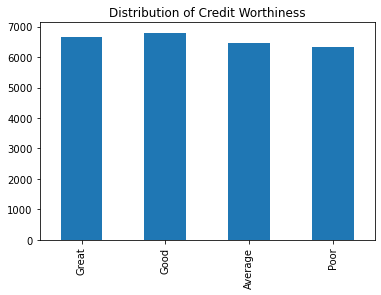

In [22]:
train.quantile_label.value_counts().sort_index().plot.bar()
plt.title("Distribution of Credit Worthiness")


In [23]:
pd.crosstab(train.quantile_label, train.flag_own_realty, margins=True)


flag_own_realty,0,1,All
quantile_label,,,
Great,2124,4536,6660
Good,2072,4729,6801
Average,2209,4258,6467
Poor,2185,4135,6320
All,8590,17658,26248


In [24]:
pd.crosstab(train.quantile_label, train.flag_own_realty).apply(lambda r: r/r.sum(), axis=1)


flag_own_realty,0,1
quantile_label,,
Great,0.318919,0.681081
Good,0.304661,0.695339
Average,0.341580,0.658420
Poor,0.345728,0.654272


In [25]:
pd.crosstab(train.quantile_label, train.flag_own_car).apply(lambda r: r/r.sum(), axis=1)


flag_own_car,0,1
quantile_label,,
Great,0.624925,0.375075
Good,0.624908,0.375092
Average,0.612340,0.387660
Poor,0.606804,0.393196


In [26]:
#No apparent relationship between owning a car or property and class of credit. 

In [27]:
pd.crosstab(train.quantile_label, train.cnt_children).apply(lambda r: r/r.sum(), axis=1)


cnt_children,0,1,2,3,4,5,7,14,19
quantile_label,,,,,,,,,
Great,0.684384,0.211712,0.088438,0.012162,0.002252,0.001051,0.000000,0.000000,0.000000
Good,0.693280,0.213939,0.079988,0.009999,0.001617,0.001029,0.000000,0.000000,0.000147
Average,0.682233,0.209989,0.094170,0.011133,0.002165,0.000155,0.000000,0.000155,0.000000
Poor,0.704272,0.188133,0.092247,0.013133,0.001741,0.000158,0.000158,0.000158,0.000000


In [28]:
train.flag_own_realty.mean()

0.6727369704358427

In [29]:
train.flag_own_car.mean()

0.38254343188052425

In [32]:
train.flag_mobil.mean()

1.0

In [33]:
train.flag_phone.mean()

0.29545108198719905

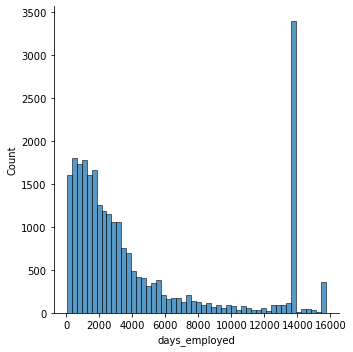

In [34]:
sns.displot(train, x="days_employed")


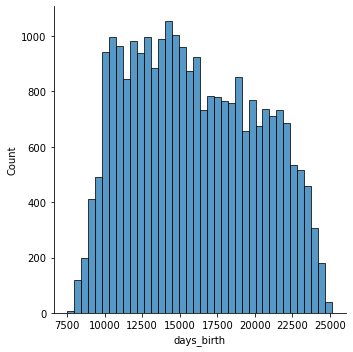

In [35]:
sns.displot(train, x="days_birth")


<AxesSubplot:xlabel='days_birth', ylabel='score'>

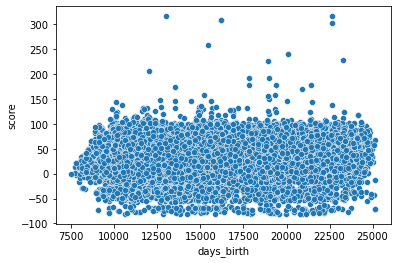

In [36]:
sns.scatterplot(data=train, x='days_birth', y='score')

<AxesSubplot:xlabel='days_employed', ylabel='score'>

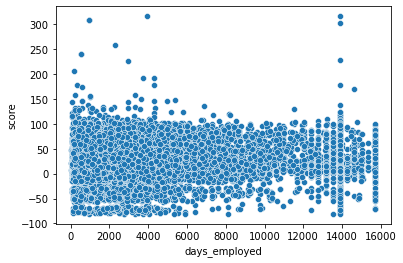

In [43]:
sns.scatterplot(data=train, x='days_employed', y='score')

<AxesSubplot:xlabel='amt_income_total', ylabel='score'>

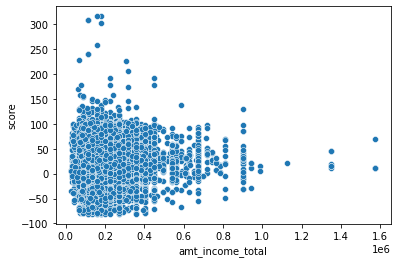

In [40]:
sns.scatterplot(data=train, x='amt_income_total', y='score')

In [41]:
#Doesn't appear to be any correlation between credit score and any of the continuous numeric variables.

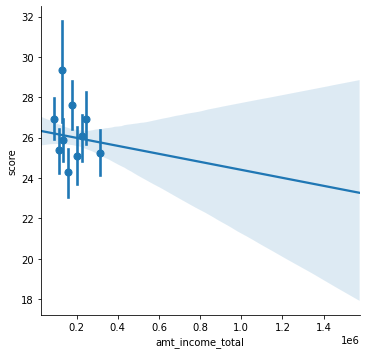

In [44]:
sns.lmplot(x="amt_income_total", y="score", data = train, x_bins=10)


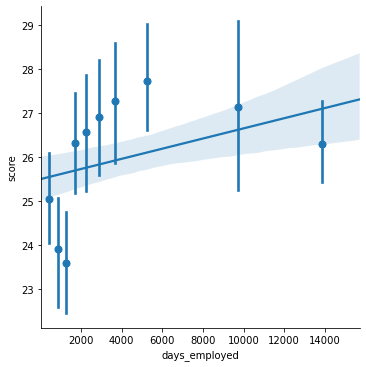

In [45]:
sns.lmplot(x="days_employed", y="score", data = train, x_bins=10)


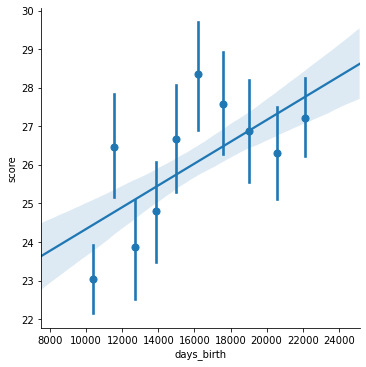

In [46]:
sns.lmplot(x="days_birth", y="score", data = train, x_bins=10)


In [47]:
results, bin_edges = pd.qcut(train['score'],
                            q=[0, .25, .5, .75, 1],
                            labels=bin_labels_4,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_4),
                            columns=['Threshold', 'Tier'])

In [48]:
results_table

,Threshold,Tier
0,-81.0,Great
1,7.0,Good
2,24.0,Average
3,44.0,Poor


In [50]:
from anthony_wranglev2 import wrangle_credit
train, validate, test = wrangle_credit()
train

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,120-149,paid_off,no_debt,month_01,month_02,month_03,month_04,month_05,month_06,defaulted
22151,5142128,F,0,0,0,283500.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,0.0,0.0,6.0,X,X,X,X,X,X,False
21572,5136981,F,0,0,0,306000.0,State servant,Higher education,Married,House / apartment,...,0.0,2.0,0.0,0,0,1,1,C,C,False
8328,5052719,F,0,0,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0.0,6.0,0.0,C,C,C,C,C,C,False
19787,5117901,F,0,0,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0.0,6.0,0.0,C,C,C,C,C,C,False
12424,5069147,M,0,1,0,216000.0,Commercial associate,Higher education,Married,House / apartment,...,0.0,1.0,4.0,0,X,X,X,X,C,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,5010277,M,0,1,1,562500.0,Working,Incomplete higher,Married,House / apartment,...,0.0,6.0,0.0,C,C,C,C,C,C,False
7609,5048072,F,0,1,0,193500.0,Working,Higher education,Single / not married,House / apartment,...,0.0,0.0,0.0,0,0,0,0,0,0,False
12342,5068964,M,1,0,0,202500.0,Working,Higher education,Married,House / apartment,...,0.0,6.0,0.0,C,C,C,C,C,C,False
4530,5033495,F,0,1,3,126000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.0,0.0,0.0,0,0,0,0,0,0,False


In [51]:
train.defaulted.value_counts()

False    17568
True        65
Name: defaulted, dtype: int64

In [54]:
1 - (65/17568)

0.9963000910746812

In [55]:
#Baseline accuracy of 99.6%

In [57]:
pd.crosstab(train.defaulted, train.name_family_status, margins=True)


name_family_status,Civil marriage,Married,Separated,Single / not married,Widow,All
defaulted,,,,,,
False,1398,12282,1071,2150,667,17568
True,3,47,4,9,2,65
All,1401,12329,1075,2159,669,17633


In [58]:
pd.crosstab(train.defaulted, train.name_housing_type, margins=True)


name_housing_type,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,All
defaulted,,,,,,,
False,83,15683,566,115,252,869,17568
True,1,61,1,0,2,0,65
All,84,15744,567,115,254,869,17633


In [59]:
pd.crosstab(train.defaulted, train.name_education_type, margins=True)


name_education_type,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,All
defaulted,,,,,,
False,22,4842,719,198,11787,17568
True,0,20,4,0,41,65
All,22,4862,723,198,11828,17633


In [60]:
pd.crosstab(train.defaulted, train.name_income_type, margins=True)


name_income_type,Commercial associate,Pensioner,State servant,Student,Working,All
defaulted,,,,,,
False,4186,2833,1525,8,9016,17568
True,20,12,5,0,28,65
All,4206,2845,1530,8,9044,17633
